# Clustering

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

#### 1. Carregar dados

In [2]:
df = pd.read_excel("./data/L01-data-first projects.xlsx", sheet_name='catalog', usecols='A:J')

df.head()

,ID,Total LTD Orders,Total 24 Month Orders,Number of Divisns w/ Purchase,Number of Credit Cards Used,Customer Gender,Different Day/Night Phone (yes=1),Dwelling Type Indicator,Overall RFM Points,First Purch Mail Order (yes=1)
0,53005,1,1,1,1,1,1,1,28,0
1,53006,1,1,1,0,1,0,1,27,1
2,53007,1,1,1,1,1,0,1,28,0
3,53008,2,2,1,1,1,0,1,30,0
4,53009,1,1,1,1,0,0,1,26,0


In [3]:
df.tail()

,ID,Total LTD Orders,Total 24 Month Orders,Number of Divisns w/ Purchase,Number of Credit Cards Used,Customer Gender,Different Day/Night Phone (yes=1),Dwelling Type Indicator,Overall RFM Points,First Purch Mail Order (yes=1)
5124,58129,20,11,6,2,1,0,1,23,0
5125,58130,5,1,3,1,1,0,1,7,0
5126,58131,6,1,1,2,1,0,1,27,1
5127,58132,3,1,2,1,1,1,1,8,1
5128,58133,3,0,3,1,1,1,1,4,1


#### 2. Clustering com k-means (2 clusters)

In [4]:
clustering = KMeans(n_clusters = 2, 
                    init = 'random', 
                    n_init = 10, 
                    max_iter = 100, 
                    random_state = 42)

In [5]:
len(df.columns)

10

In [6]:
# excluir ID

df.iloc[:, 1:10].head()

,Total LTD Orders,Total 24 Month Orders,Number of Divisns w/ Purchase,Number of Credit Cards Used,Customer Gender,Different Day/Night Phone (yes=1),Dwelling Type Indicator,Overall RFM Points,First Purch Mail Order (yes=1)
0,1,1,1,1,1,1,1,28,0
1,1,1,1,0,1,0,1,27,1
2,1,1,1,1,1,0,1,28,0
3,2,2,1,1,1,0,1,30,0
4,1,1,1,1,0,0,1,26,0


In [7]:
y_clust = clustering.fit_predict(df.iloc[:, 1:10])

In [8]:
df['cluster'] = y_clust

In [9]:
df.head()

,ID,Total LTD Orders,Total 24 Month Orders,Number of Divisns w/ Purchase,Number of Credit Cards Used,Customer Gender,Different Day/Night Phone (yes=1),Dwelling Type Indicator,Overall RFM Points,First Purch Mail Order (yes=1),cluster
0,53005,1,1,1,1,1,1,1,28,0,1
1,53006,1,1,1,0,1,0,1,27,1,1
2,53007,1,1,1,1,1,0,1,28,0,1
3,53008,2,2,1,1,1,0,1,30,0,1
4,53009,1,1,1,1,0,0,1,26,0,1


In [10]:
df['cluster'].value_counts()

1    3347
0    1782
Name: cluster, dtype: int64

É sempre difícil definir qual o melhor valor de `k`. Para tal, podemos usar a **"regra do cotovelo"** para avaliar quais os valores de `k` mais adequados.

Para além disso, no algoritmo **k-means clássico a inicialização dos centroides é feita de forma aleatória**. Alternativamente, podemos usar uma variante como o **k-means++**, que utiliza um método optimizado para a inicialização dos centroides.

#### 3. Determinar os melhores valores para o número de clusters, k, com a "regra do cotovelo"

In [11]:
clustering.inertia_

916047.0801734756

In [12]:
def elbow_method(k_max, algo, data):

    distortions = []

    for i in range(1, k_max+1):
        clustering = KMeans(n_clusters = i, 
                            init = algo, 
                            n_init = 10, 
                            max_iter = 100, 
                            random_state = 42)

        clustering.fit(data)
        distortions.append(clustering.inertia_)
        
    return distortions

In [13]:
elbow_method(10, 'k-means++', df.iloc[:, 1:10])

[2110427.6607525786,
 916047.0801734756,
 553909.4028317851,
 409386.41281708237,
 294348.1941352257,
 251454.2986036821,
 221610.2451886903,
 193570.16800554088,
 168803.1529942744,
 149035.42442884925]

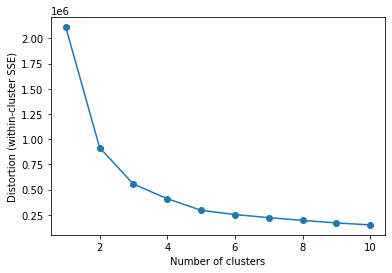

In [14]:
plt.plot(range(1,11), elbow_method(10, 'k-means++', df.iloc[:, 1:10]), marker = 'o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion (within-cluster SSE)');

O "cotovelo" corresponderá ao valor de 3 ou 4 para `k`. Vamos usar `k=3`.

#### 4. Clustering com k-means (3 clusters)

In [15]:
clustering = KMeans(n_clusters = 3, 
                    init = 'k-means++', 
                    n_init = 10, 
                    max_iter = 100, 
                    random_state = 42)

In [16]:
y_clust = clustering.fit_predict(df.iloc[:, 1:10])

In [17]:
df['cluster'] = y_clust

In [18]:
df['cluster'].value_counts()

1    3323
0    1467
2     339
Name: cluster, dtype: int64

In [19]:
df[df['cluster'] == 0]

,ID,Total LTD Orders,Total 24 Month Orders,Number of Divisns w/ Purchase,Number of Credit Cards Used,Customer Gender,Different Day/Night Phone (yes=1),Dwelling Type Indicator,Overall RFM Points,First Purch Mail Order (yes=1),cluster
3153,56158,30,0,14,2,0,1,1,8,1,0
3154,56159,9,5,4,3,1,0,1,20,1,0
3155,56160,2,1,2,1,1,0,1,2,1,0
3156,56161,8,1,4,2,1,0,1,8,1,0
3158,56163,25,0,14,1,1,0,1,6,1,0
...,...,...,...,...,...,...,...,...,...,...,...
5123,58128,4,1,1,1,1,0,1,19,0,0
5124,58129,20,11,6,2,1,0,1,23,0,0
5125,58130,5,1,3,1,1,0,1,7,0,0
5127,58132,3,1,2,1,1,1,1,8,1,0


In [20]:
df.iloc[:, 1:10][df['cluster'] == 0].mean()

Total LTD Orders                     12.642127
Total 24 Month Orders                 2.012952
Number of Divisns w/ Purchase         4.831629
Number of Credit Cards Used           1.871847
Customer Gender                       0.873211
Different Day/Night Phone (yes=1)     0.341513
Dwelling Type Indicator               0.915474
Overall RFM Points                   13.462168
First Purch Mail Order (yes=1)        0.775733
dtype: float64

In [21]:
df.iloc[:, 1:10][df['cluster'] == 1].mean()

Total LTD Orders                      1.661751
Total 24 Month Orders                 1.334336
Number of Divisns w/ Purchase         1.083057
Number of Credit Cards Used           0.937707
Customer Gender                       0.885044
Different Day/Night Phone (yes=1)     0.263617
Dwelling Type Indicator               0.998194
Overall RFM Points                   40.552814
First Purch Mail Order (yes=1)        0.187481
dtype: float64

In [22]:
df.iloc[:, 1:10][df['cluster'] == 2].mean()

Total LTD Orders                     47.489676
Total 24 Month Orders                 7.802360
Number of Divisns w/ Purchase        11.828909
Number of Credit Cards Used           2.227139
Customer Gender                       0.884956
Different Day/Night Phone (yes=1)     0.303835
Dwelling Type Indicator               0.917404
Overall RFM Points                   18.719764
First Purch Mail Order (yes=1)        0.876106
dtype: float64

#### 5. Análise gráfica dos valores médios das variáveis para cada cluster

In [23]:
# reduzir o nome das variáveis aos seus primeiros 15 caracteres

xlabels = []

for value in df.columns[1:10]:
    xlabels.append(value[0:15])

xlabels

['Total LTD Order',
 'Total 24 Month ',
 'Number of Divis',
 'Number of Credi',
 'Customer Gender',
 'Different Day/N',
 'Dwelling Type I',
 'Overall RFM Poi',
 'First Purch Mai']

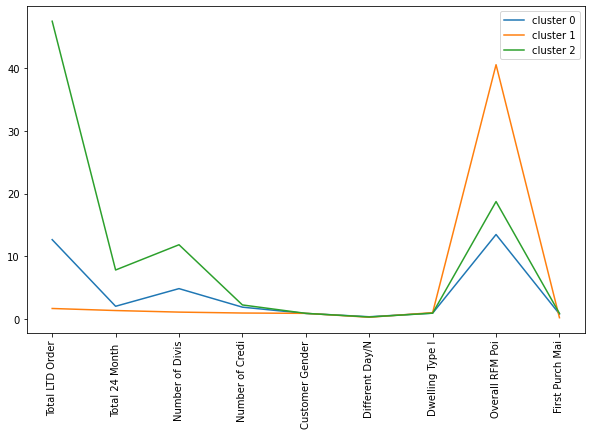

In [24]:
plt.figure(figsize=(10,6))
plt.plot(df.iloc[:, 1:10][df['cluster']==0].mean(), label='cluster 0')
plt.plot(df.iloc[:, 1:10][df['cluster']==1].mean(), label='cluster 1')
plt.plot(df.iloc[:, 1:10][df['cluster']==2].mean(), label='cluster 2')

plt.xticks(np.arange(9), xlabels, rotation=90)
plt.legend(loc=1);

Aparentemente, os nossos 3 clusters apresentam as seguintes características:

* cluster 0: valores intermédios para o total de encomendas e número de departamentos e valores baixos para o total de encomendas nos últimos 24 meses e para os pontos RFM;
* cluster 1: valor alto para os pontos RFM e valores baixos para todos os outros
* cluster 2: valores altos para o total de encomendas, o total de encomendas nos últimos 24 meses e o número de departamentos, e valor intermédio para os pontos RFM

No entanto, como podemos observar, as variáveis em que o intervalo de valores numéricos é maior são aquelas que apresentam maior preponderância para a definição dos clusters. Como o algoritmo k-means se baseia na distância euclidiana entre pontos, era de esperar que tal acontecesse.

Para evitar que tal aconteça, devemos certificar-nos que todas as **variáveis são representadas na mesma escala**.

#### 6. Normalizing features (min=0 e max=1)

In [25]:
df.describe()

,ID,Total LTD Orders,Total 24 Month Orders,Number of Divisns w/ Purchase,Number of Credit Cards Used,Customer Gender,Different Day/Night Phone (yes=1),Dwelling Type Indicator,Overall RFM Points,First Purch Mail Order (yes=1),cluster
count,5129.000000,5129.000000,5129.000000,5129.000000,5129.000000,5129.000000,5129.000000,5129.000000,5129.000000,5129.000000,5129.000000
mean,55569.000000,7.831351,1.955937,2.865471,1.290115,0.881653,0.288555,0.969195,31.361279,0.401248,0.780074
std,1480.759096,13.441103,2.730413,3.387229,0.846935,0.323050,0.453135,0.172806,14.514165,0.490199,0.551187
min,53005.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
25%,54287.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,18.000000,0.000000,0.000000
50%,55569.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,35.000000,0.000000,1.000000
75%,56851.000000,10.000000,2.000000,4.000000,1.000000,1.000000,1.000000,1.000000,43.000000,1.000000,1.000000
max,58133.000000,169.000000,57.000000,28.000000,6.000000,1.000000,1.000000,1.000000,75.000000,1.000000,2.000000


In [26]:
df.columns

Index(['ID', 'Total LTD Orders', 'Total 24 Month Orders',
       'Number of Divisns w/ Purchase', 'Number of Credit Cards Used',
       'Customer Gender', 'Different Day/Night Phone (yes=1)',
       'Dwelling Type Indicator', 'Overall RFM Points',
       'First Purch Mail Order (yes=1)', 'cluster'],
      dtype='object')

In [27]:
df_normalized = df.copy()

In [28]:
df_normalized.head()

,ID,Total LTD Orders,Total 24 Month Orders,Number of Divisns w/ Purchase,Number of Credit Cards Used,Customer Gender,Different Day/Night Phone (yes=1),Dwelling Type Indicator,Overall RFM Points,First Purch Mail Order (yes=1),cluster
0,53005,1,1,1,1,1,1,1,28,0,1
1,53006,1,1,1,0,1,0,1,27,1,1
2,53007,1,1,1,1,1,0,1,28,0,1
3,53008,2,2,1,1,1,0,1,30,0,1
4,53009,1,1,1,1,0,0,1,26,0,1


In [29]:
# eliminar colunas ID e cluster

df_normalized.drop(['ID', 'cluster'], axis=1, inplace=True)

In [30]:
df_normalized.head()

,Total LTD Orders,Total 24 Month Orders,Number of Divisns w/ Purchase,Number of Credit Cards Used,Customer Gender,Different Day/Night Phone (yes=1),Dwelling Type Indicator,Overall RFM Points,First Purch Mail Order (yes=1)
0,1,1,1,1,1,1,1,28,0
1,1,1,1,0,1,0,1,27,1
2,1,1,1,1,1,0,1,28,0
3,2,2,1,1,1,0,1,30,0
4,1,1,1,1,0,0,1,26,0


In [31]:
mms = MinMaxScaler()

df_normalized[['Total LTD Orders', 'Total 24 Month Orders', 'Number of Divisns w/ Purchase', 'Number of Credit Cards Used', 'Overall RFM Points']] = mms.fit_transform(df[['Total LTD Orders', 'Total 24 Month Orders', 'Number of Divisns w/ Purchase', 'Number of Credit Cards Used', 'Overall RFM Points']])

In [32]:
df_normalized.head()

,Total LTD Orders,Total 24 Month Orders,Number of Divisns w/ Purchase,Number of Credit Cards Used,Customer Gender,Different Day/Night Phone (yes=1),Dwelling Type Indicator,Overall RFM Points,First Purch Mail Order (yes=1)
0,0.000000,0.017544,0.0,0.166667,1,1,1,0.356164,0
1,0.000000,0.017544,0.0,0.000000,1,0,1,0.342466,1
2,0.000000,0.017544,0.0,0.166667,1,0,1,0.356164,0
3,0.005952,0.035088,0.0,0.166667,1,0,1,0.383562,0
4,0.000000,0.017544,0.0,0.166667,0,0,1,0.328767,0


In [33]:
# min = 0
# max = 1

df_normalized.describe()

,Total LTD Orders,Total 24 Month Orders,Number of Divisns w/ Purchase,Number of Credit Cards Used,Customer Gender,Different Day/Night Phone (yes=1),Dwelling Type Indicator,Overall RFM Points,First Purch Mail Order (yes=1)
count,5129.000000,5129.000000,5129.000000,5129.000000,5129.000000,5129.000000,5129.000000,5129.000000,5129.000000
mean,0.040663,0.034315,0.069092,0.215019,0.881653,0.288555,0.969195,0.402209,0.401248
std,0.080007,0.047902,0.125453,0.141156,0.323050,0.453135,0.172806,0.198824,0.490199
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.017544,0.000000,0.166667,1.000000,0.000000,1.000000,0.219178,0.000000
50%,0.000000,0.017544,0.000000,0.166667,1.000000,0.000000,1.000000,0.452055,0.000000
75%,0.053571,0.035088,0.111111,0.166667,1.000000,1.000000,1.000000,0.561644,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


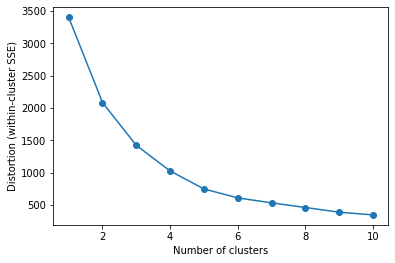

In [34]:
# regra do cotovelo para dados 'normalizados'

plt.plot(range(1,11), elbow_method(10, 'k-means++', df_normalized), marker = 'o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion (within-cluster SSE)');

Com os dados 'normalizados', `k=3` parece ser a melhor escolha.

In [35]:
clustering = KMeans(n_clusters = 3, 
                    init = 'k-means++', 
                    n_init = 10, 
                    max_iter = 100, 
                    random_state = 42)

In [36]:
y_clust = clustering.fit_predict(df_normalized)

In [37]:
df_normalized['cluster'] = y_clust

In [38]:
df_normalized['cluster'].value_counts()

1    2193
0    1480
2    1456
Name: cluster, dtype: int64

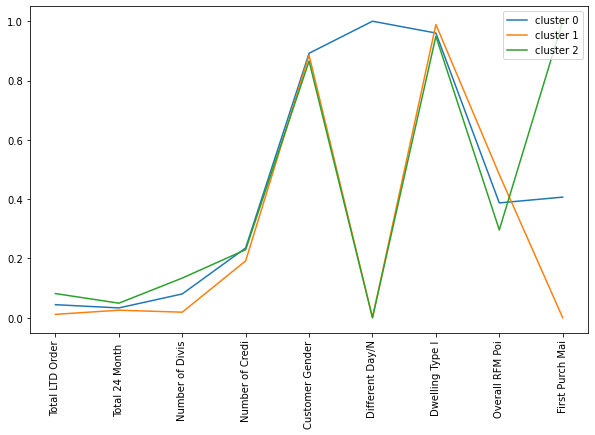

In [39]:
plt.figure(figsize=(10,6))
plt.plot(df_normalized.iloc[:, 0:9][df_normalized['cluster']==0].mean(), label='cluster 0')
plt.plot(df_normalized.iloc[:, 0:9][df_normalized['cluster']==1].mean(), label='cluster 1')
plt.plot(df_normalized.iloc[:, 0:9][df_normalized['cluster']==2].mean(), label='cluster 2')

plt.xticks(np.arange(9), xlabels, rotation=90)
plt.legend(loc=1);

Desta feita, as variáveis que melhor distinguem os clusters parecem ser `Different Day/Night Phone` and `First Purch Mail Order`, seguidas de `Number of Divisns w/ Purchase`.

#### 7. Standardizing features (std=1 e mean=0)

In [40]:
df_standardized = df.copy()

In [41]:
# eliminar colunas ID e cluster

df_standardized.drop(['ID', 'cluster'], axis=1, inplace=True)

In [42]:
df_standardized.head()

,Total LTD Orders,Total 24 Month Orders,Number of Divisns w/ Purchase,Number of Credit Cards Used,Customer Gender,Different Day/Night Phone (yes=1),Dwelling Type Indicator,Overall RFM Points,First Purch Mail Order (yes=1)
0,1,1,1,1,1,1,1,28,0
1,1,1,1,0,1,0,1,27,1
2,1,1,1,1,1,0,1,28,0
3,2,2,1,1,1,0,1,30,0
4,1,1,1,1,0,0,1,26,0


In [43]:
stds = StandardScaler()

df_standardized[df_standardized.columns] = stds.fit_transform(df[df_standardized.columns])

In [44]:
df_standardized.head()

,Total LTD Orders,Total 24 Month Orders,Number of Divisns w/ Purchase,Number of Credit Cards Used,Customer Gender,Different Day/Night Phone (yes=1),Dwelling Type Indicator,Overall RFM Points,First Purch Mail Order (yes=1)
0,-0.508293,-0.350141,-0.55079,-0.342580,0.366378,1.570204,0.178282,-0.231609,-0.818621
1,-0.508293,-0.350141,-0.55079,-1.523424,0.366378,-0.636860,0.178282,-0.300514,1.221567
2,-0.508293,-0.350141,-0.55079,-0.342580,0.366378,-0.636860,0.178282,-0.231609,-0.818621
3,-0.433887,0.016139,-0.55079,-0.342580,0.366378,-0.636860,0.178282,-0.093799,-0.818621
4,-0.508293,-0.350141,-0.55079,-0.342580,-2.729424,-0.636860,0.178282,-0.369419,-0.818621


In [45]:
# std = 1
# mean = 0

df_standardized.describe()

,Total LTD Orders,Total 24 Month Orders,Number of Divisns w/ Purchase,Number of Credit Cards Used,Customer Gender,Different Day/Night Phone (yes=1),Dwelling Type Indicator,Overall RFM Points,First Purch Mail Order (yes=1)
count,5.129000e+03,5.129000e+03,5.129000e+03,5.129000e+03,5.129000e+03,5.129000e+03,5.129000e+03,5129.000000,5.129000e+03
mean,-8.866199e-17,-4.433100e-17,-4.433100e-17,-4.433100e-17,9.420337e-17,7.757924e-17,6.649649e-17,0.000000,1.773240e-16
std,1.000097e+00,1.000097e+00,1.000097e+00,1.000097e+00,1.000097e+00,1.000097e+00,1.000097e+00,1.000097,1.000097e+00
min,-5.082929e-01,-7.164218e-01,-5.507903e-01,-1.523424e+00,-2.729424e+00,-6.368599e-01,-5.609102e+00,-2.023137,-8.186208e-01
25%,-5.082929e-01,-3.501412e-01,-5.507903e-01,-3.425804e-01,3.663777e-01,-6.368599e-01,1.782817e-01,-0.920658,-8.186208e-01
50%,-5.082929e-01,-3.501412e-01,-5.507903e-01,-3.425804e-01,3.663777e-01,-6.368599e-01,1.782817e-01,0.250726,-8.186208e-01
75%,1.613603e-01,1.613949e-02,3.349758e-01,-3.425804e-01,3.663777e-01,1.570204e+00,1.782817e-01,0.801965,1.221567e+00
max,1.199190e+01,2.016157e+01,7.421105e+00,5.561636e+00,3.663777e-01,1.570204e+00,1.782817e-01,3.006923,1.221567e+00


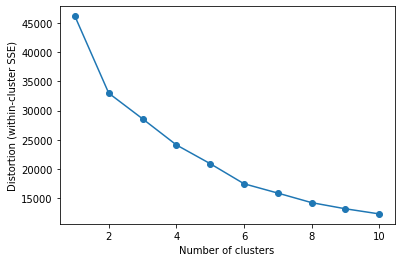

In [46]:
# regra do cotovelo para dados 'standardizados'

plt.plot(range(1,11), elbow_method(10, 'k-means++', df_standardized), marker = 'o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion (within-cluster SSE)');

Com os dados 'standardizados', `k=2` parece ser a melhor escolha.

In [47]:
clustering = KMeans(n_clusters = 2, 
                    init = 'k-means++', 
                    n_init = 10, 
                    max_iter = 100, 
                    random_state = 42)

In [48]:
y_clust = clustering.fit_predict(df_standardized)

In [49]:
df_standardized['cluster'] = y_clust

In [50]:
df_standardized['cluster'].value_counts()

0    3474
1    1655
Name: cluster, dtype: int64

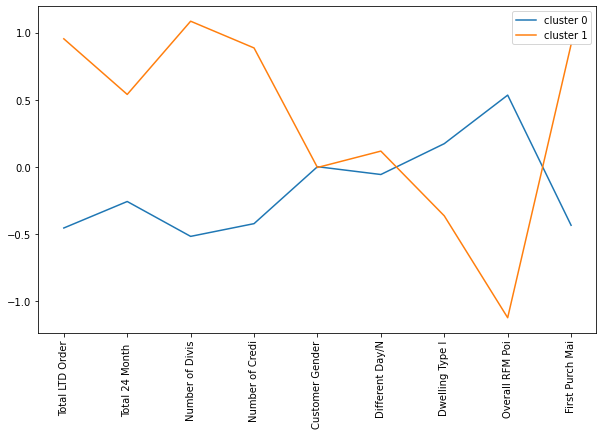

In [51]:
plt.figure(figsize=(10,6))
plt.plot(df_standardized.iloc[:, 0:9][df_standardized['cluster']==0].mean(), label='cluster 0')
plt.plot(df_standardized.iloc[:, 0:9][df_standardized['cluster']==1].mean(), label='cluster 1')

plt.xticks(np.arange(9), xlabels, rotation=90)
plt.legend(loc=1);

Com excepção das variáveis `Customer Gender` e `Different Day/Night Phone`, todas as outras são relevantes na distinção entre os clusters.

#### 8. Clustering com DBSCAN

Alternativamente, podemos usar um algoritmo de clustering baseado na densidade como o DBSCAN. Neste caso, os clusters já não têm a forma de uma esfera (ou hiper-esfera), podendo esta forma ser arbitrária.

In [52]:
clustering = DBSCAN(eps=1, min_samples=20)

In [53]:
y_clust = clustering.fit_predict(df.iloc[:, 1:10])

In [54]:
df['cluster'] = y_clust

In [55]:
# amostras 'noisy' têm label -1

df['cluster'].value_counts()

 0    2545
-1    2267
 2     222
 1      62
 3      33
Name: cluster, dtype: int64

Grande parte das amostras é considerada 'noisy'. Como o parâmetro épsilon se baseia na distância euclidiana, é mais uma vez importante 'normalizar/standardizar' as variáveis.

In [56]:
df_normalized.drop(['cluster'], axis=1, inplace=True)

In [57]:
clustering = DBSCAN(eps=0.5, min_samples=200)

In [58]:
y_clust = clustering.fit_predict(df_normalized)

In [59]:
df_normalized['cluster'] = y_clust

In [60]:
# amostras 'noisy' têm label -1

df_normalized['cluster'].value_counts()

 2    1918
 1    1195
 0     770
-1     502
 4     495
 3     249
Name: cluster, dtype: int64

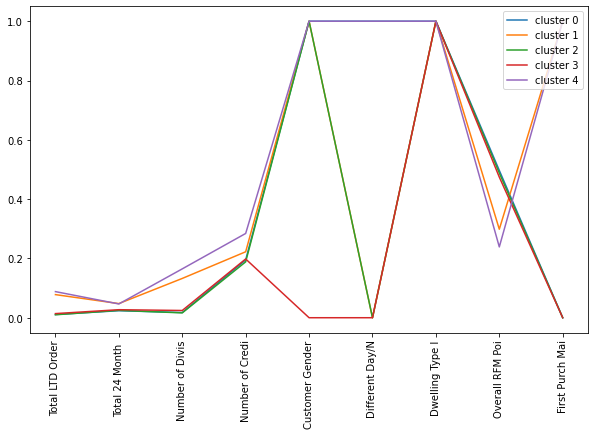

In [61]:
plt.figure(figsize=(10,6))
plt.plot(df_normalized.iloc[:, 0:9][df_normalized['cluster']==0].mean(), label='cluster 0')
plt.plot(df_normalized.iloc[:, 0:9][df_normalized['cluster']==1].mean(), label='cluster 1')
plt.plot(df_normalized.iloc[:, 0:9][df_normalized['cluster']==2].mean(), label='cluster 2')
plt.plot(df_normalized.iloc[:, 0:9][df_normalized['cluster']==3].mean(), label='cluster 3')
plt.plot(df_normalized.iloc[:, 0:9][df_normalized['cluster']==4].mean(), label='cluster 4')

plt.xticks(np.arange(9), xlabels, rotation=90)
plt.legend(loc=1);

In [62]:
df_standardized.drop(['cluster'], axis=1, inplace=True)

In [63]:
clustering = DBSCAN(eps=2, min_samples=100)

In [64]:
y_clust = clustering.fit_predict(df_standardized)

In [65]:
df_standardized['cluster'] = y_clust

In [66]:
# amostras 'noisy' têm label -1

df_standardized['cluster'].value_counts()

 2    1893
 1    1123
 0     745
-1     547
 4     455
 3     238
 5     128
Name: cluster, dtype: int64

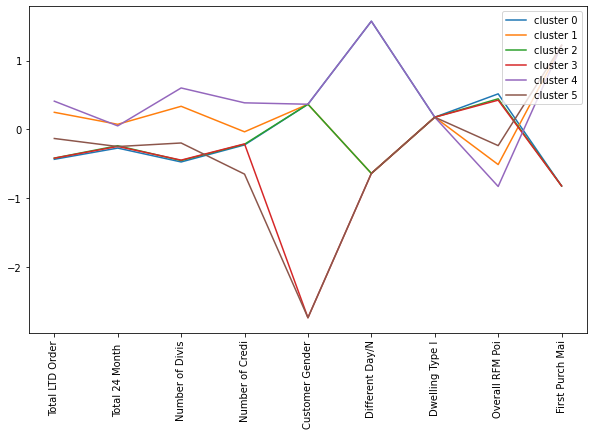

In [67]:
plt.figure(figsize=(10,6))
plt.plot(df_standardized.iloc[:, 0:9][df_standardized['cluster']==0].mean(), label='cluster 0')
plt.plot(df_standardized.iloc[:, 0:9][df_standardized['cluster']==1].mean(), label='cluster 1')
plt.plot(df_standardized.iloc[:, 0:9][df_standardized['cluster']==2].mean(), label='cluster 2')
plt.plot(df_standardized.iloc[:, 0:9][df_standardized['cluster']==3].mean(), label='cluster 3')
plt.plot(df_standardized.iloc[:, 0:9][df_standardized['cluster']==4].mean(), label='cluster 4')
plt.plot(df_standardized.iloc[:, 0:9][df_standardized['cluster']==5].mean(), label='cluster 5')

plt.xticks(np.arange(9), xlabels, rotation=90)
plt.legend(loc=1);